In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [10]:
results = pd.read_csv('xbart_gp_time.csv')
results['method'][results['method']=='jackknife+ XBART'] = 'Jackknife+ XBART'
results['method'][results['method']=='jackknife+ RF'] = 'Jackknife+ RF'
lty = {"XBART":"dotted" ,"XBART-GP": "solid" , "Jackknife+ XBART": "dashed" , 
         "Jackknife+ RF":"dashdot", "CV+ XBART":(0, (3, 1, 1, 1, 1, 1)), "CV+ RF":(0, (3, 1, 1, 1))}

ntrial = len(results['itrial'].unique())
dgp_list = results['dgp'].unique()
method_names = results['method'].unique()
n_list = results['n'].unique()

/var/folders/01/l9rwq0097m9dz413l3qd0lxm0000gp/T/ipykernel_43129/2472291135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['method'][results['method']=='jackknife+ XBART'] = 'Jackknife+ XBART'
/var/folders/01/l9rwq0097m9dz413l3qd0lxm0000gp/T/ipykernel_43129/2472291135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['method'][results['method']=='jackknife+ RF'] = 'Jackknife+ RF'


In [3]:
results = results[results['coverage_type']!='Overall']
df = results.groupby(['n', 'method', 'coverage_type'], sort =False).mean().round(3)
df.drop(['itrial', 'num_outliers'],axis=1,inplace=True)
df.reset_index(inplace=True)
df = df[df['n'] != 200]
df = df[df['n'] != 150]
df = df[df['n'] != 50]
df = df.pivot(index=['n','method'],columns='coverage_type')
df = df[[('rmse', 'Interior'), ('rmse', 'Exterior'), \
         ('coverage', 'Interior'), ('coverage', 'Exterior'), \
        ('width', 'Interior'), ('width', 'Exterior'), ('time', 'Exterior')]]
df = df.sort_index(level = [0], ascending =True)#, key=lambda k: (-k[0],k[1]))
# df.to_csv('sort_results.csv')
df

rmse          coverage             width           \
coverage_type        Interior Exterior Interior Exterior Interior Exterior   
n   method                                                                   
100 CV+ RF              3.350    4.485    0.849    0.726    9.946   10.076   
    CV+ XBART           1.909    3.037    0.948    0.800    7.791    7.847   
    Jackknife+ RF       3.289    4.437    0.849    0.703    9.603    9.663   
    Jackknife+ XBART    1.880    3.003    0.955    0.780    7.456    7.490   
    XBART               2.524    3.721    0.780    0.591    6.358    6.340   
    XBART-GP            2.248    2.600    0.849    0.838    6.452    7.389   
300 CV+ RF              3.023    4.437    0.829    0.651    8.343    8.407   
    CV+ XBART           1.842    3.184    0.877    0.634    5.779    5.816   
    Jackknife+ RF       2.993    4.401    0.828    0.645    8.165    8.238   
    Jackknife+ XBART    1.820    3.158    0.859    0.607    5.404    5.432   
    XBART               2.043    3.416    0.781    0.544    5.133    5.136   
    XBART-GP            1.693    2.000    0.875    0.858    5.340    6.121   
500 CV+ RF              2.916    4.508    0.823    0.606    7.829    7.897   
    CV+ XBART           1.734    3.076    0.867    0.608    5.203    5.235   
    Jackknife+ RF       2.888    4.466    0.818    0.606    7.667    7.726   
    Jackknife+ XBART    1.719    3.029    0.859    0.598    4.965    4.999   
    XBART               1.843    3.215    0.820    0.549    4.937    4.979   
    XBART-GP            1.480    1.791    0.917    0.907    5.213    6.131   

                         time  
coverage_type        Exterior  
n   method                     
100 CV+ RF              0.277  
    CV+ XBART           2.507  
    Jackknife+ RF       2.984  
    Jackknife+ XBART   27.724  
    XBART               0.290  
    XBART-GP            1.335  
300 CV+ RF              0.827  
    CV+ XBART           4.803  
    Jackknife+ RF      28.059  
    Jackknife+ XBART  152.982  
    XBART               0.614  
    XBART-GP            4.491  
500 CV+ RF              1.595  
    CV+ XBART           6.301  
    Jackknife+ RF      92.039  
    Jackknife+ XBART  338.032  
    XBART               0.851  
    XBART-GP            7.168

linear


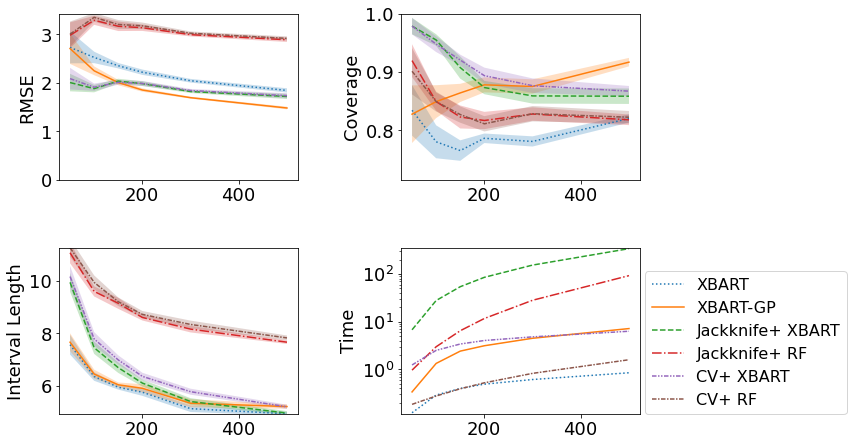

In [15]:
plt.rcParams.update({'font.size': 18})

for dgp in dgp_list: 
    print(dgp)
    fig, axes = plt.subplots(2, 2, sharey=False, figsize=(10,7))
    fig.tight_layout(pad = 2)
    
    for method in method_names:
        rmse_mean = results[(results['dgp']==dgp)&(results['coverage_type']=='Interior')&\
                    (results['method']==method)].groupby('n')['rmse'].mean()#.reindex(coverage_type)
        rmse_SE = results[(results['dgp']==dgp)&(results['coverage_type'] == 'Interior')&\
                    (results['method']==method)].groupby('n')['rmse'].std()\
                        /np.sqrt(ntrial)
        axes[0,0].plot(rmse_mean.index,rmse_mean,label=method, linestyle = lty[method])
        axes[0,0].fill_between(rmse_mean.index,rmse_mean-rmse_SE,rmse_mean+rmse_SE,alpha = 0.25)
    plt.sca(axes[0,0])
    plt.ylabel('RMSE')
    plt.ylim([0, 1.1*results[(results['dgp']==dgp)&(results['coverage_type'] == 'Interior')]\
              .groupby('method')['rmse'].mean().max()])
    
    for method in method_names:
        coverage_mean = results[(results['dgp']==dgp)&(results['coverage_type']=='Interior')&\
                    (results['method']==method)].groupby('n')['coverage'].mean()#.reindex(coverage_type)
        coverage_SE = results[(results['dgp']==dgp)&(results['coverage_type'] == 'Interior')&\
                    (results['method']==method)].groupby('n')['coverage'].std()\
                        /np.sqrt(ntrial)
        axes[0,1].plot(coverage_mean.index,coverage_mean,label=method, linestyle = lty[method])
        axes[0,1].fill_between(coverage_mean.index,coverage_mean-coverage_SE,coverage_mean+coverage_SE,alpha = 0.25)
    plt.sca(axes[0,1])
    plt.ylabel('Coverage')
    plt.ylim([0.9*results[(results['dgp']==dgp)&(results['coverage_type'] == 'Interior')]\
              .groupby('method')['coverage'].mean().min(),1])
    
    # interior interval width
    for method in method_names:
        width_mean = results[(results['dgp']==dgp)&(results['coverage_type'] == 'Interior')&\
            (results['method']==method)].groupby('n')['width'].mean()
        width_SE = results[(results['dgp']==dgp)&(results['coverage_type'] == 'Interior')&\
            (results['method']==method)].groupby('n')['width'].std()/np.sqrt(ntrial)
        axes[1,0].plot(width_mean.index,width_mean,label=method, linestyle = lty[method])
        axes[1,0].fill_between(width_mean.index,width_mean-width_SE,width_mean+width_SE,alpha = 0.25)
    plt.sca(axes[1,0])
    plt.ylim([results[(results['dgp']==dgp)&(results['coverage_type'] == 'Interior')].groupby(['method', 'n'])['width'].mean().min(),\
              results[(results['dgp']==dgp)&(results['coverage_type'] == 'Interior')].groupby(['method', 'n'])['width'].mean().max()])
    plt.ylabel('Interval Length')
    
    for method in method_names:
        time_mean = results[(results['dgp']==dgp)&\
            (results['method']==method)].groupby('n')['time'].mean()
        time_SE = results[(results['dgp']==dgp)&\
            (results['method']==method)].groupby('n')['time'].std()/np.sqrt(ntrial)
        axes[1,1].plot(time_mean.index,time_mean,label=method, linestyle = lty[method])
        axes[1,1].fill_between(time_mean.index,time_mean-time_SE,time_mean+time_SE,alpha = 0.25)
#     if(dgp==dgp_list[0]):
#         plt.legend(loc=(1.04,0))
#         plt.ylim([0, results[(results['dgp']==dgp)].groupby('method')['time'].max().max()])
    plt.sca(axes[1,1])
    plt.ylabel('Time')
    plt.ylim([results[(results['dgp']==dgp)]['time'].min(), results[(results['dgp']==dgp)]['time'].max()])
    axes[1,1].set_yscale('log')
#     plt.xticks(n_list)
    plt.sca(axes[1,1])
    legend = plt.legend(loc="lower right", bbox_to_anchor=(1.9, -0.05), fontsize=16)
    fig.savefig('jackknife_'+dgp+'_time_interior.pdf', dpi="figure", bbox_inches='tight')

linear


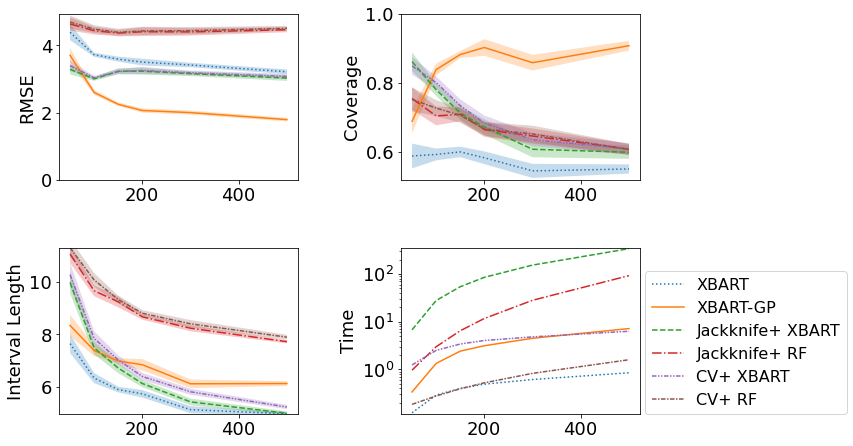

In [16]:
plt.rcParams.update({'font.size': 18})

for dgp in dgp_list: 
    print(dgp)
    fig, axes = plt.subplots(2, 2, sharey=False, figsize=(10,7))
    fig.tight_layout(pad = 2)
    
    for method in method_names:
        rmse_mean = results[(results['dgp']==dgp)&(results['coverage_type']=='Exterior')&\
                    (results['method']==method)].groupby('n')['rmse'].mean()#.reindex(coverage_type)
        rmse_SE = results[(results['dgp']==dgp)&(results['coverage_type'] == 'Exterior')&\
                    (results['method']==method)].groupby('n')['rmse'].std()\
                        /np.sqrt(ntrial)
        axes[0,0].plot(rmse_mean.index,rmse_mean,label=method, linestyle = lty[method])
        axes[0,0].fill_between(rmse_mean.index,rmse_mean-rmse_SE,rmse_mean+rmse_SE,alpha = 0.25)
    plt.sca(axes[0,0])
    plt.ylabel('RMSE')
    plt.ylim([0, 1.1*results[(results['dgp']==dgp)&(results['coverage_type'] == 'Exterior')]\
              .groupby('method')['rmse'].mean().max()])
    
    for method in method_names:
        coverage_mean = results[(results['dgp']==dgp)&(results['coverage_type']=='Exterior')&\
                    (results['method']==method)].groupby('n')['coverage'].mean()#.reindex(coverage_type)
        coverage_SE = results[(results['dgp']==dgp)&(results['coverage_type'] == 'Exterior')&\
                    (results['method']==method)].groupby('n')['coverage'].std()\
                        /np.sqrt(ntrial)
        axes[0,1].plot(coverage_mean.index,coverage_mean,label=method, linestyle = lty[method])
        axes[0,1].fill_between(coverage_mean.index,coverage_mean-coverage_SE,coverage_mean+coverage_SE,alpha = 0.25)
    plt.sca(axes[0,1])
    plt.ylabel('Coverage')
    plt.ylim([0.9*results[(results['dgp']==dgp)&(results['coverage_type'] == 'Exterior')]\
              .groupby('method')['coverage'].mean().min(),1])
    
    # interior interval width
    for method in method_names:
        width_mean = results[(results['dgp']==dgp)&(results['coverage_type'] == 'Exterior')&\
            (results['method']==method)].groupby('n')['width'].mean()
        width_SE = results[(results['dgp']==dgp)&(results['coverage_type'] == 'Exterior')&\
            (results['method']==method)].groupby('n')['width'].std()/np.sqrt(ntrial)
        axes[1,0].plot(width_mean.index,width_mean,label=method, linestyle = lty[method])
        axes[1,0].fill_between(width_mean.index,width_mean-width_SE,width_mean+width_SE,alpha = 0.25)
    plt.sca(axes[1,0])
    plt.ylim([results[(results['dgp']==dgp)&(results['coverage_type'] == 'Exterior')].groupby(['method', 'n'])['width'].mean().min(),\
              results[(results['dgp']==dgp)&(results['coverage_type'] == 'Exterior')].groupby(['method', 'n'])['width'].mean().max()])
    plt.ylabel('Interval Length')
    
    for method in method_names:
        time_mean = results[(results['dgp']==dgp)&\
            (results['method']==method)].groupby('n')['time'].mean()
        time_SE = results[(results['dgp']==dgp)&\
            (results['method']==method)].groupby('n')['time'].std()/np.sqrt(ntrial)
        axes[1,1].plot(time_mean.index,time_mean,label=method, linestyle = lty[method])
        axes[1,1].fill_between(time_mean.index,time_mean-time_SE,time_mean+time_SE,alpha = 0.25)
#     if(dgp==dgp_list[0]):
#         plt.legend(loc=(1.04,0))
#         plt.ylim([0, results[(results['dgp']==dgp)].groupby('method')['time'].max().max()])
    plt.sca(axes[1,1])
    plt.ylabel('Time')
    plt.ylim([results[(results['dgp']==dgp)]['time'].min(), results[(results['dgp']==dgp)]['time'].max()])
#     plt.xticks(n_list)
    axes[1,1].set_yscale('log')
    plt.sca(axes[1,1])
    legend = plt.legend(loc="lower right", bbox_to_anchor=(1.9, -0.05), fontsize=16)
    fig.savefig('jackknife_'+dgp+'_time_exterior.pdf', dpi="figure", bbox_inches='tight')